# Grade: /100 pts
# Assignment 8: Customer Segmentation with Clustering

In this assignment, you will be solving a traditional problem in quantitative marketing: customer segmentation. Having a properly segmented database is extremely important to define marketing campaigns, as it allows companies to define value-centric actions targeted towards customers of different profiles. In this ocassion you are going to analyze customers of a supermarket chain *Fruver*.

Assume you are the owner of a consulting company that is in charge of this project. In this assignment you are going to analyze 2 different strategies performed by your employees. At the end you are going to decide which one produces the best result in segmentating the customers.

The information is provided in the document `data_customers.csv` which has the following columns:

- **ID:** Customer identifier (it does not have prediction power).
- **Education:** Education status of the customer.
- **Income:** Customer's annual household income.
- **Kidhome:** Number of children in customer's family.
- **Teenhome:** Number of teenagers in customer's family.
- **Recency:** Number of days since the last purchase in the supermarket.
- **NumWebVisitsMonth:** Number of visits to the supermarket web page the last month.
- **Complain:** If the customer has had claims.
- **Living_Status**: If the customer lives alone or does not.
- **Total_Promos_accept**: Number of total promotions accepted.
- **Age**: Current customer's age.
- **Total_Consumption**: Total amount spent in the supermarket.
- **Total_Num_Purchases**: Total Number of purchases.
- **Seniority**: Number of months in which the client has been enrolled with the supermarket.

### Follow These Steps before submitting
Once you are finished, ensure to complete the following steps.

1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.

2.  Fix any errors which result from this.

3.  Repeat steps 1. and 2. until your notebook runs without errors.

4.  Submit your completed notebook to OWL by the deadline. 

5.  Your submission document should be saved in the form: `LastName_FirstName_Assignment5.ipynb`


In [1]:
# pip install yellowbrick

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering, KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
#from yellowbrick.cluster.elbow import kelbow_visualizer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.decomposition import PCA
import datetime
import seaborn as sns
import itertools
%matplotlib inline

## Question 1 Loading the data and Preprocessing (5 pts)


1. Import the data and select only the customers with ages lower than 100 years. Report the new data shape. Is there any null value?
2. Your employees took these numeric predictors: `Income`, `Recency`, `NumWebVisitsMonth`, `Age`, `Total_Consumption`, `Total_Num_Purchases`, and `Seniority`. Therefore create the data frame `data_customers_num` that only contains these variables. Print the shape of this new data frame. Notice your employees used neither `Kidhome` nor `Teenhome` since their range is {0, 1, 2}, therefore it is better to take those as categorical variables.
3. Present the descriptive statistics of the numeric variables. What can you say about the variables you have? Why should you normalize the data? Normalize the data and create the new data frame `df_num_z`. (Do not forget to include the names of its columns as the columns of `data_customers_num`).

In [3]:
# 1pt
# Read the data
data_customers = pd.read_csv('data_customers.csv')
# New data
data_customers_sample = data_customers[data_customers['Age']<100]
print(f'The new data shape is:{data_customers_sample.shape}')
print(f'The number of null values is :{data_customers_sample.isna().sum(axis=0).sum()}')

The new data shape is:(2205, 14)
The number of null values is :0


In [4]:
# 1pt
# numeric predictors
data_customers_num = data_customers_sample[['Income', 'Recency', 'NumWebVisitsMonth', 'Age', 'Total_Consumption', 'Total_Num_Purchases', 'Seniority']]
print(f'The new shape is {data_customers_num.shape}')

The new shape is (2205, 7)


In [5]:
# 0.5 pts
# Descriptive statistics
data_customers_num.describe()

,Income,Recency,NumWebVisitsMonth,Age,Total_Consumption,Total_Num_Purchases,Seniority
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000
mean,51622.094785,49.009070,5.336961,45.095692,606.821769,14.887982,18.143764
std,20713.063826,28.932111,2.413535,11.705801,601.675284,7.615277,7.670134
min,1730.000000,0.000000,0.000000,18.000000,5.000000,0.000000,1.000000
25%,35196.000000,24.000000,3.000000,37.000000,69.000000,8.000000,13.000000
50%,51287.000000,49.000000,6.000000,44.000000,397.000000,15.000000,18.000000
75%,68281.000000,74.000000,7.000000,55.000000,1047.000000,21.000000,24.000000
max,113734.000000,99.000000,20.000000,74.000000,2525.000000,43.000000,36.000000


In [6]:
# 1 pt
# Standardization
normalizer = StandardScaler()
df_num_z = pd.DataFrame(normalizer.fit_transform(data_customers_num), columns=data_customers_num.columns)

In [7]:
# 0.5 pts
# Descriptive statistics for normalized data
df_num_z.describe()

,Income,Recency,NumWebVisitsMonth,Age,Total_Consumption,Total_Num_Purchases,Seniority
count,2.205000e+03,2.205000e+03,2.205000e+03,2.205000e+03,2.205000e+03,2.205000e+03,2.205000e+03
mean,2.255691e-17,7.975480e-17,3.544658e-17,1.643432e-16,9.667248e-18,2.255691e-17,1.450087e-17
std,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00
min,-2.409272e+00,-1.694318e+00,-2.211765e+00,-2.315248e+00,-1.000470e+00,-1.955459e+00,-2.235639e+00
25%,-7.932106e-01,-8.646014e-01,-9.684928e-01,-6.917534e-01,-8.940766e-01,-9.047005e-01,-6.707746e-01
50%,-1.618161e-02,-3.135738e-04,2.747790e-01,-9.362368e-02,-3.488084e-01,1.471300e-02,-1.874762e-02
75%,8.044529e-01,8.639742e-01,6.892030e-01,8.462945e-01,7.317536e-01,8.027817e-01,7.636847e-01
max,2.999363e+00,1.728262e+00,6.076714e+00,2.469790e+00,3.188785e+00,3.692367e+00,2.328549e+00


**Written Answer:** Why should you normalize the data?

**ANSWER HERE (1 pt)**: The data is nomalized, especially the income and total_comsumption has very large variance. If the data is not normalized, the clustering method will be dominated by the variables with the highest magnitude. This is not correct.

____________

### Question 2: First Strategy (25 pts)

To solve the project, your employee D decided to use the following strategy: 

1. First performing dimension reduction with PCA using 2 components. Look for the best number of clusters (between 3 to 5) using `Hierarchical clustering` with `affinity = 'cosine'` and `linkage = 'complete'` and Silhuoette analysis.
2. Graph the scatter plot of the PCA-transformed data differentiated by cluster.
3. Make the scatterplot `Total_Consumption` vs `Income by clusters`.

In [8]:
# 5 pts (PCA)
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_num_z)

In [9]:
# 8 pts 
# Silhuoette Analysis
# Range for the number of clusters
range_n_clusters = [3,4,5]
for n in range_n_clusters:
    clusters = AgglomerativeClustering(n_clusters=n , affinity='cosine', linkage='complete')
    cluster_fit = clusters.fit_predict(pca_data)
    silouoette = silhouette_score(pca_data, cluster_fit)
    print(f'For {n} clusters, the silhuoette score is {silouoette}')
    

For 3 clusters, the silhuoette score is 0.346086259157868
For 4 clusters, the silhuoette score is 0.2873768083484753
For 5 clusters, the silhuoette score is 0.2958156431791859


**Written Answer:** How many clusters did D select based on the previous results?

**ANSWER HERE (2pts):** Based on the result, we should select 3 clusters since it has the largest silhouette score.

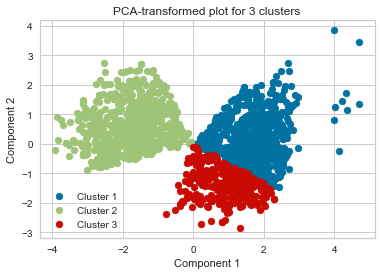

In [10]:
# 5 pts second point
for i in range(3):
    color = cm.nipy_spectral(float(i) / 3)
    plt.scatter(pca_data[cluster_fit==i, 0], pca_data[cluster_fit==i, 1], 
                label='Cluster %i' % (i+1))

plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('PCA-transformed plot for %i clusters' % 3)
plt.legend()

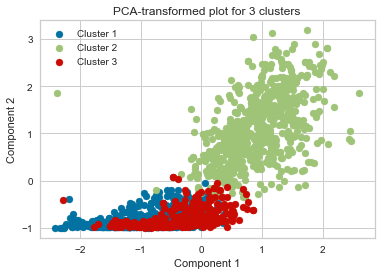

In [11]:
# 5 pts
# Scatterplot
y = df_num_z['Total_Consumption']
x = df_num_z['Income']
for i in range(3):
    color = cm.nipy_spectral(float(i) / 3)
    plt.scatter(x[cluster_fit==i], y[cluster_fit==i], 
                label='Cluster %i' % (i+1))

plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('PCA-transformed plot for %i clusters' % 3)
plt.legend()

## Question 3: Second Strategy (55 pts)

### 3.1 (30 pts)

Employee J selected a different approach:
1. First J studied the silhouette average score taking into account only the sample of three predictors from the seven total ones, and selecting the combination with the maximum value.

You are going to replicate these results, generating a data frame `Results_df` whose columns are `Subset_Predictors`, `AVG_S_3`, `AVG_S_4`, `AVG_S_5`, where:
- `Subset_Predictors` are the three predictors that have been taken into consideration, eg: `[Age, Income, Total_Consumption]`.
- `AVG_S_i` is the average silhouette_score using $k = i$ clusters, when performing KMeans method over the `Subset_Predictors` variables.

P did not forget that as a team, you always use a `random_state = 3`, also J remembered `itertools.combinations` function may be useful.

In [12]:
# 9 pts 
# Generate the data frame of results
# Initialize the DataFrame and set the name of its columns
range_n_clusters = [3,4,5]
possibilities = list(itertools.combinations(df_num_z.columns,3))
np = len(possibilities)
Result_df = pd.DataFrame(dtype=object)
def convertTuple(tuple):
    str = ''
    for item in tuple:
        str = str + item + " "
        return str
for i in range(np):
    d1 = pd.DataFrame(df_num_z[possibilities[i][0]])
    d2 = pd.DataFrame(df_num_z[possibilities[i][1]])
    d3 = pd.DataFrame(df_num_z[possibilities[i][2]])
    Subset_Predictors = possibilities[i]
    Subset_Predictors_data = pd.concat([d1,d2,d3],axis=1)
    clusterer3 = KMeans(n_clusters=3, random_state=3)
    clusterer4 = KMeans(n_clusters=4, random_state=3)
    clusterer5 = KMeans(n_clusters=5, random_state=3)
    cluster_labels3 = clusterer3.fit_predict(Subset_Predictors_data)
    cluster_labels4 = clusterer4.fit_predict(Subset_Predictors_data)
    cluster_labels5 = clusterer5.fit_predict(Subset_Predictors_data)
    silhouette_avg3 = silhouette_score(Subset_Predictors_data, cluster_labels3)
    silhouette_avg4 = silhouette_score(Subset_Predictors_data, cluster_labels4)
    silhouette_avg5 = silhouette_score(Subset_Predictors_data, cluster_labels5)
    predict_str = ','.join(Subset_Predictors)
    toadd = pd.DataFrame({'Subset_Predictors':predict_str, 'AVG_S_3': silhouette_avg3, 'AVG_S_4':silhouette_avg4, 'AVG_S_5': silhouette_avg5},index=[i])
    Result_df = pd.concat([Result_df,toadd],ignore_index=True, axis = 0)

#Fill the Result_df according indications



In [13]:
# 15 pts 
# Print the first 5 rows of the Result_df matrix
Result_df.head()

,Subset_Predictors,AVG_S_3,AVG_S_4,AVG_S_5
0,"Income,Recency,NumWebVisitsMonth",0.327811,0.315628,0.303211
1,"Income,Recency,Age",0.262795,0.270539,0.282886
2,"Income,Recency,Total_Consumption",0.372856,0.365725,0.350162
3,"Income,Recency,Total_Num_Purchases",0.363048,0.354449,0.330624
4,"Income,Recency,Seniority",0.234998,0.260839,0.254934


In [14]:
# 1 pt
# Report the shape of Result_df DataFrame
Result_df.shape

(35, 4)

In [15]:
# 2 pts
# Find the maximum avg silhouette_score
max_score = Result_df.max(numeric_only=True).max()
print(f'The maximum average silhouette score using a subset of 3 predictors is :{max_score}')

The maximum average silhouette score using a subset of 3 predictors is :0.44859544430501574


**Written Answer:** What is the subset of 3 predictors that generated the maximum average silhouette score? How many clusters did J decide to use?

In [16]:
# 1 pt
# Find the index when we find the maximum value
Result_df.loc[(Result_df['AVG_S_3'] == Result_df.max(numeric_only=True).max())]

,Subset_Predictors,AVG_S_3,AVG_S_4,AVG_S_5
12,"Income,Total_Consumption,Total_Num_Purchases",0.448595,0.398436,0.335564


**ANSWER HERE (2pts):** The maximum average silhouette score is 0.448595. The subset of 3 predictors are Income, total_Consumption and total_num_purchases. And J uses 3 clusters according to the highest socre. 

### 3.2 Verification (15 pts)

J wants to verify this is indeed the best number of clusters. 
1. Create an elbow plot of between 3 and 10 clusters for the selected subset of variables, using `calinski_harabasz` metric. According with this metric what is the best number of clusters? What is the meaning of this metric?
2. Secondly, perform the silhouette analysis for the same cluster range, using `SilhouetteVisualizer` function as it was shown in `LabWeek10` to generate the plot, do not forget to print the average Silhouette scores!. **Does the previous result agree with the given by silhouette analysis?**


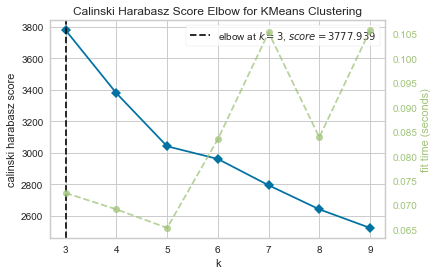

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [17]:
# 5 pts
# Code for creating the elbow plot
KClusterer = KMeans(n_clusters=3, random_state=3)
visualizer = KElbowVisualizer(KClusterer, 
                              k=(3,10),
                              metric='calinski_harabasz',
                             )   
X = df_num_z[['Income','Total_Consumption','Total_Num_Purchases']]
visualizer.fit(X)       
visualizer.show()   

**ANSWER HERE (3pts)**  
According to this metric, the best number of clusters is 3. When using this metric, the clusters themselves very compact and are well-spaced from each other are good clusters.

C:\Users\angel\AppData\Local\Temp\ipykernel_14640\3721833194.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster_label_scaled'] = KClusterer.fit_predict(X)
C:\Users\angel\anaconda3\envs\ds3000\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


The silhouette score for K-means is 0.674


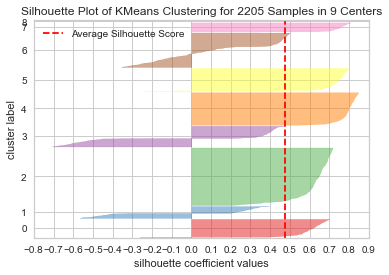

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 2205 Samples in 9 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [19]:
# 5 pts
# Second point
# Code for creating the silhouette analysis
X.shape
KClusterer.fit(X)
X['cluster_label_scaled'] = KClusterer.fit_predict(X)

kmeans_sil_avg = silhouette_score(X, X['cluster_label_scaled'])
print('The silhouette score for K-means is %.3f' % kmeans_sil_avg)

# We can plot a silhouette plot for k-means using yellowbricks
visualizer = SilhouetteVisualizer(KClusterer) # Get the kmeans model
visualizer.fit(X) # Pass the scaled data
visualizer.show() # show the plot

**ANSWER HERE (2pts):**  
The previous result is a bit different than the silhouette analysis. 

### 3.3  PCA for clustering visualization (5 pts)

Considering the previous selection, J decided to visualize the results with PCA transformation. J applied PCA transformation using 2 components, created the scatterplot differentiating clusters with different colours. **Note the clusters still must be calculated over the unrotated data.**

In [20]:
pca_trans = PCA(n_components=2)
pca_data = pca_trans.fit_transform(X)

### 3.3 Scatterplot. (5 pts)

At the end J also presented the scatterplot of `Total_Consumption` vs `Income` differentiated by cluster.

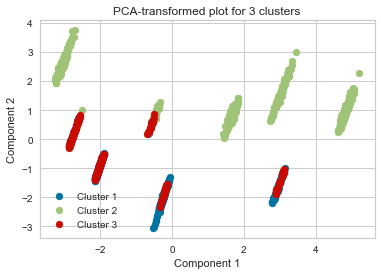

In [21]:
#ceate the scatterplot differentiating clusters with different colours
for i in range(3):
    color = cm.nipy_spectral(float(i) / 3)
    plt.scatter(pca_data[cluster_fit==i, 0], pca_data[cluster_fit==i, 1], 
                label='Cluster %i' % (i+1))

plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('PCA-transformed plot for %i clusters' % 3)
plt.legend()

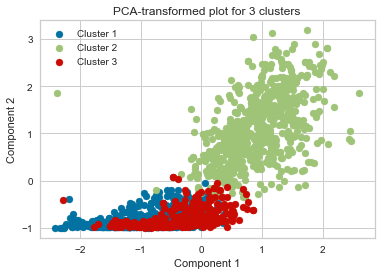

In [22]:
#the scatterplot of Total_Consumption vs Income differentiated by cluster.
y = X['Total_Consumption']
x = X['Income']
for i in range(3):
    color = cm.nipy_spectral(float(i) / 3)
    plt.scatter(x[cluster_fit==i], y[cluster_fit==i], 
                label='Cluster %i' % (i+1))

plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('PCA-transformed plot for %i clusters' % 3)
plt.legend()

_________

## Question 5: Deploying the model (15 pts)

### 5.1 Final Decision

**Written Answer:** Now you have to decide which method to use for customer segmentation. Decide on one of the two strategies and explain, in no more than one paragraph, what strategy would you choose.

**ANSWER HERE (4 pts):** 
I decide to use the method that J uses, which is the second strategy. The silhouette score calculated at the end is better than the first method, which indicates that the model is further away from the neighbor clusters. And it indicates that the most samples are assigned correct cluster as well.

### 5.2 Naming the clusters
Using the selected method, create a table of the averages per variable (`Income`, `Total_Consumption`, `Total_Num_Purchases`) of each cluster (use the original, non-scaled, variables, and  Pandas' `groupby` function). 

In [23]:
# 2 pts
# Generate the table
n_clusters = 3
X = df_num_z[['Income','Total_Consumption','Total_Num_Purchases']]
clusterer = KMeans(n_clusters=n_clusters, random_state=3)
X['KMeans_Clusters'] = clusterer.fit_predict(X)

# Crosstab with the averages per cluster
X.groupby(['KMeans_Clusters']).mean()

C:\Users\angel\AppData\Local\Temp\ipykernel_14640\800964759.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['KMeans_Clusters'] = clusterer.fit_predict(X)


,Income,Total_Consumption,Total_Num_Purchases
KMeans_Clusters,,,
0,-0.906266,-0.873840,-0.988615
1,1.111254,1.282697,0.944734
2,0.155614,-0.094562,0.479557


**Written Answer:** Name the different clusters and think what strategy the company could use in each of the clusters.

**ANSWER HERE (9pts):** \
The cluster 0 has low income, low total consumption and low total number of purchases. This means that they are probably not the customer that the company could consider to be targeted at all. \
The cluster 1 has high income, high total consumtion and high total number of purchases. This is a groups that is totally opposite by the cluster 0. This means that this is the customer has high income and willing to spend money. So they are highly potential customer to target. \
The cluster 2 has medium income, a bit lower total consumption and medium total number of purchases. This is a possible potential group that could be target customer. 
